In [1]:
import os, sys
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
#from skimage import tifffile
import time
import glob, os
import scipy.stats as stats
import pandas as pd
import dask.array as da
from itertools import chain

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
rootDir = r'Z:\Vickie\06052024_gain_ramp_experiments\seg\f1_20240605_111639\Output'
#corDir=rootDir+'cor_results/'
#if not os.path.exists(corDir):
#    os.makedirs(corDir)
fName = '/cells0_clean.hdf5'
fName1 = '/volume0.hdf5'
import h5py 

a = h5py.File(rootDir +fName1,'r')

f = h5py.File(rootDir +fName,'r')
#readout component time series and all cell series.
F=f['cell_timeseries']
base_f=f['cell_baseline']
X=f['cell_x']
Y=f['cell_y']
Z=f['cell_z']

W=f['cell_weights'][()]
L=f['volume_id']
V=f['volume_weight']
brain_map=a['volume_mean'][:,:,:].T
V_mask=a['volume_mask'][:,:,:].T
#timeseries = a['T'][()
#[()]  forces loading instead of just a link
print(brain_map.shape)
print(V.shape)
numCells = F.shape[0]
print(numCells)
#dff_trace=(F[:,:]-base_f[:,:])/(base_f[:,:])
#dff_trace=(F[:,:]-base_f[:,:])/(base_f[:,:]-100)
result = []
#for cell in range(cell_num):
    #result.append(average_bef_aft(cell))
#results=np.asarray(result)

(1024, 612, 18)
(1024, 612, 18)
151066


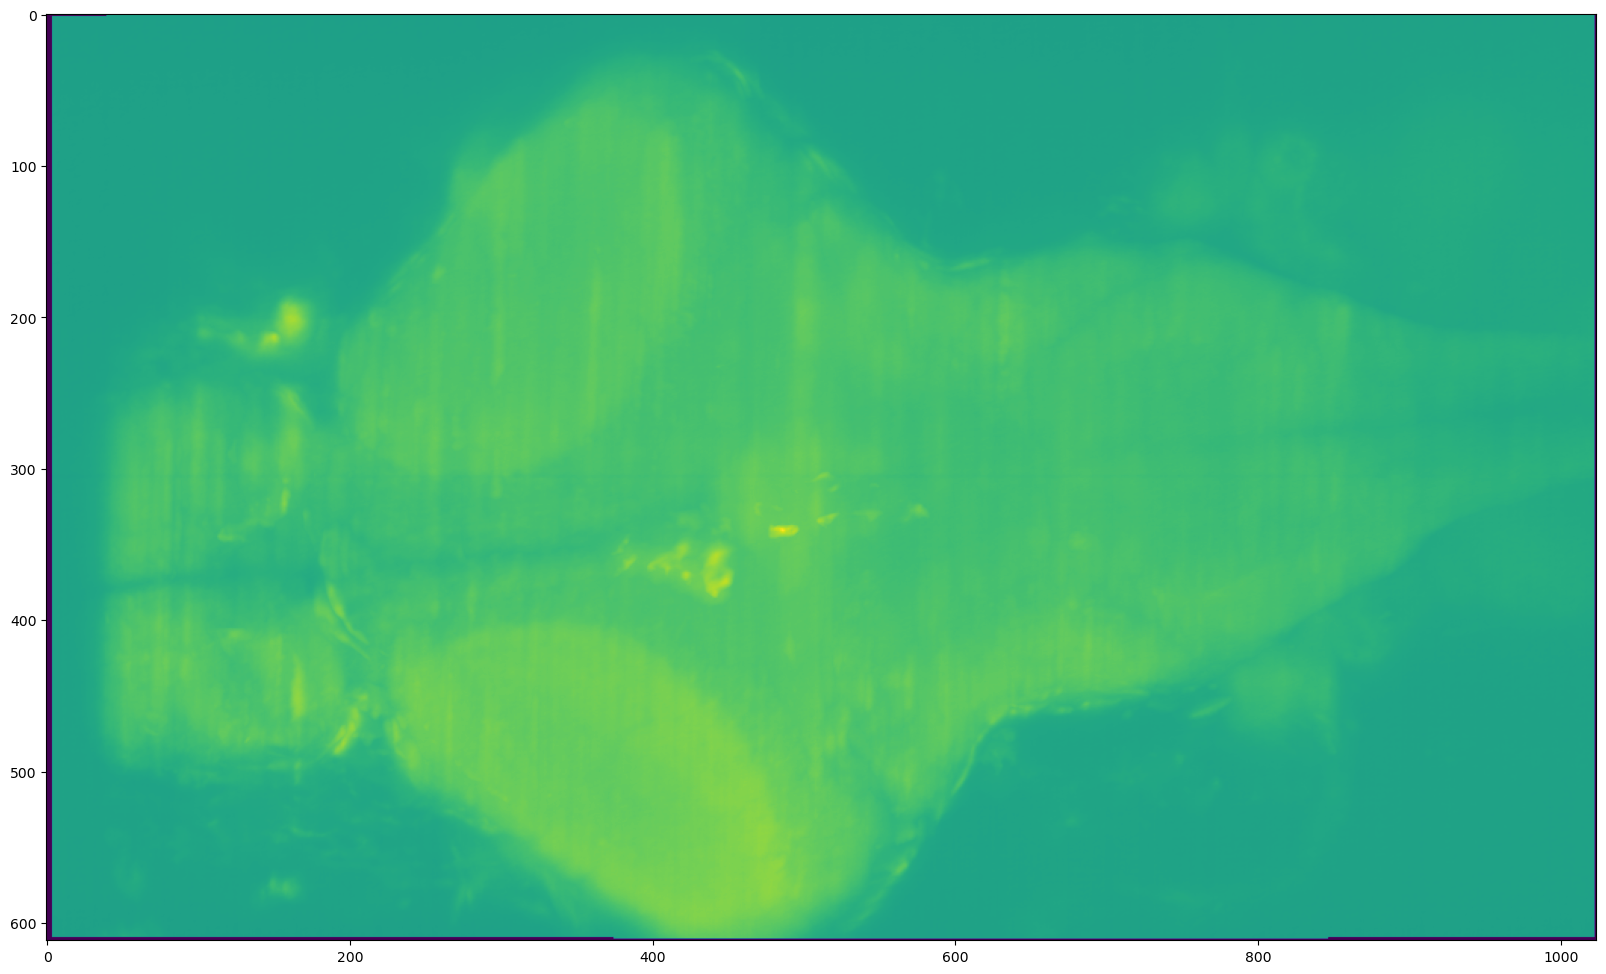

In [5]:
plt.figure(figsize=(20, 20))
plt.imshow(brain_map[:,:,:].max(axis=2).T)
plt.show()

In [2]:
dff_trace = np.load(r'C:\Users\vicki\OneDrive - Harvard University\Engert Lab\Explore_Exploit\Imaging\Processing\202408analysis\20240605_fish1_spim1\dff_trace.npy')

In [4]:
dff_trace =np.maximum(dff_trace,0)
dff_trace = np.minimum(dff_trace,np.percentile(dff_trace,99.9))

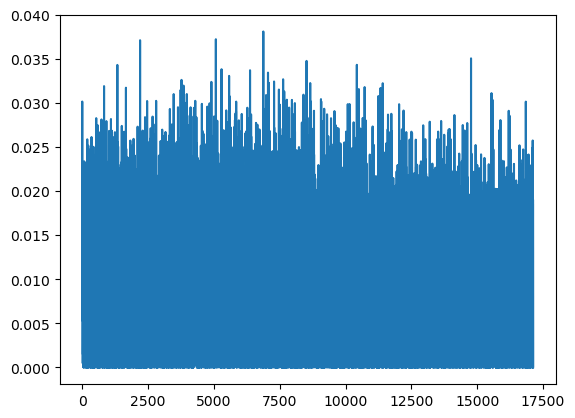

In [10]:
plt.plot(dff_trace[2])

In [6]:
dff_trace2 = np.load(r'C:\Users\vicki\OneDrive - Harvard University\Engert Lab\Explore_Exploit\Imaging\Processing\202408analysis\20240605_fish1_spim1\dff.npy')

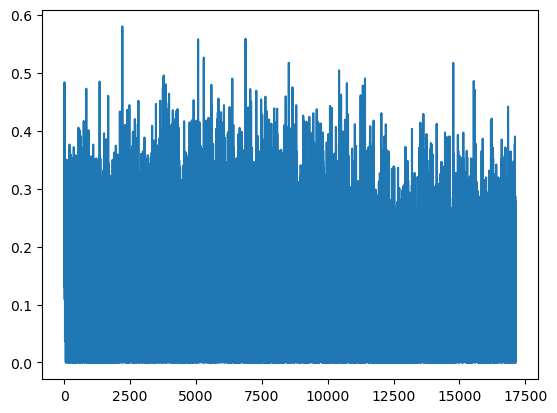

In [11]:
plt.plot(dff_trace2[2])

(0.0, 1000.0)

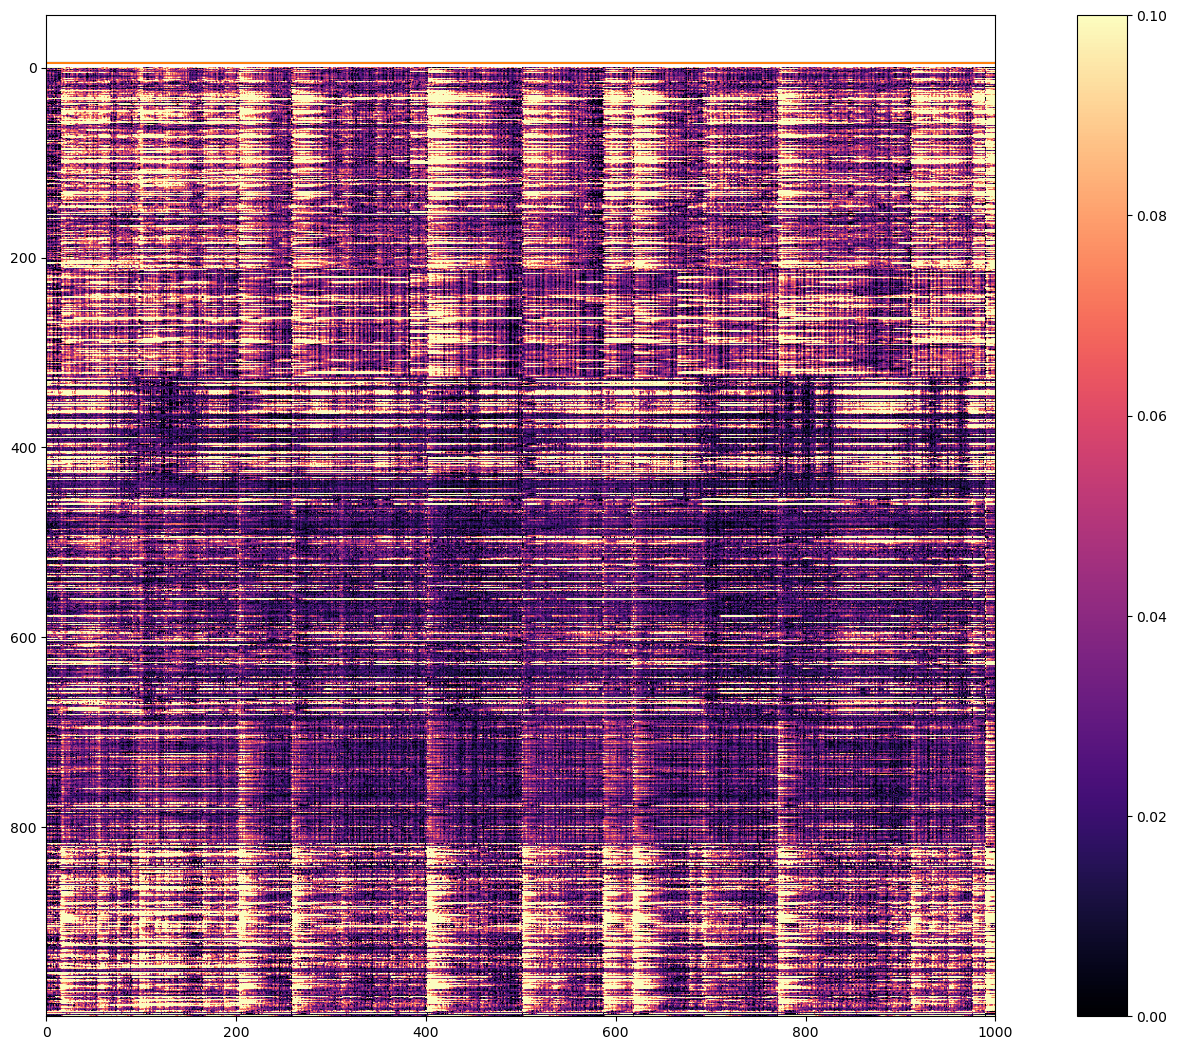

In [21]:
plt.figure(figsize=(21,13))
plt.imshow(dff_trace[0:1000,:],vmin=-0,vmax = 0.1,cmap = 'magma')
plt.plot(stimdata_post - 5)
plt.plot(stimdata - 5)
plt.colorbar()
plt.xlim(0,1000)

(0.0, 1000.0)

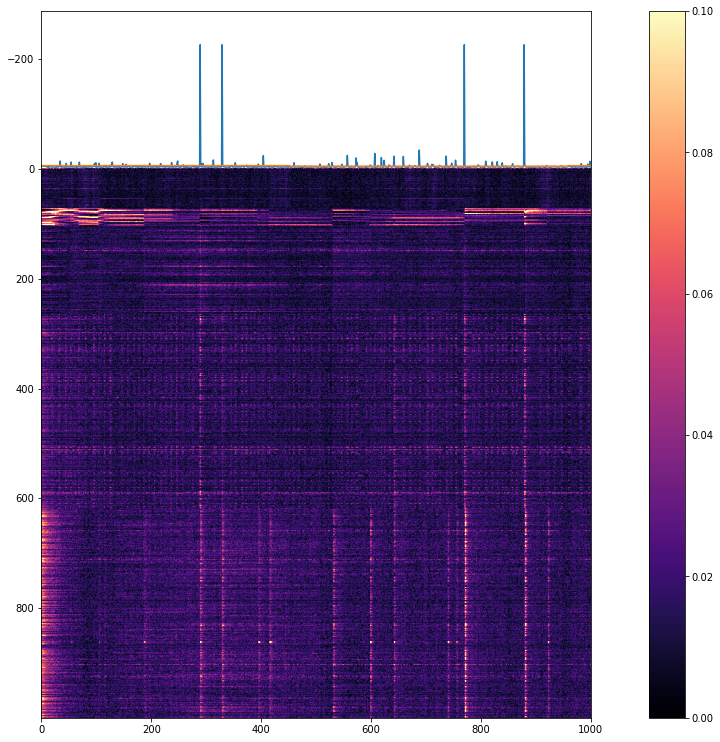

In [21]:
plt.figure(figsize=(21,13))
plt.imshow(dff_trace[0:1000,:],vmin=-0,vmax = 0.1,cmap = 'magma')
plt.plot(stimdata_post*-10 - 5)
plt.plot(stimdata*-10 - 5)
plt.colorbar()
plt.xlim(0,1000)

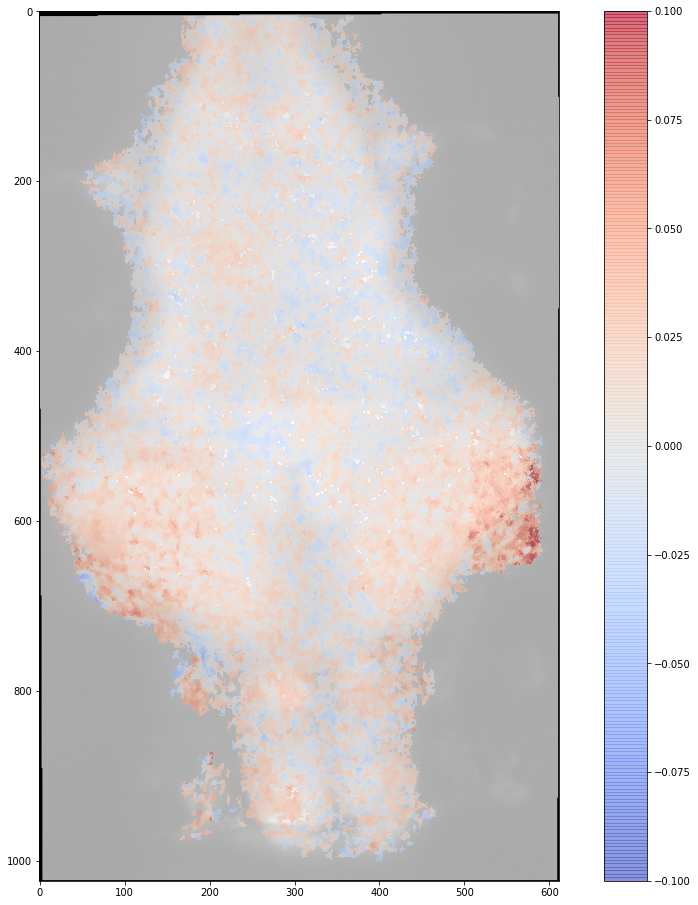

In [104]:
plt.figure(figsize = (16,16))
plt.imshow(brain_map[:,:,:last_plane].max(axis=2), vmax=np.percentile(brain_map[:].squeeze(), 99.9),cmap='gray',alpha = 1)
plt.imshow(np.nanmean(A_ext2[:,:,:last_plane],axis=2), cmap='coolwarm',alpha=0.6,vmin = -0.1,vmax = 0.1)
plt.colorbar()
#plt.savefig(r'Z:\Marc\20230519_ketamine_behavior\postket_good_20230519_173944_mikacor_results\projection_cl.png',dpi=300)

In [65]:
print(int(np.shape(A_ext2)[2]))

11


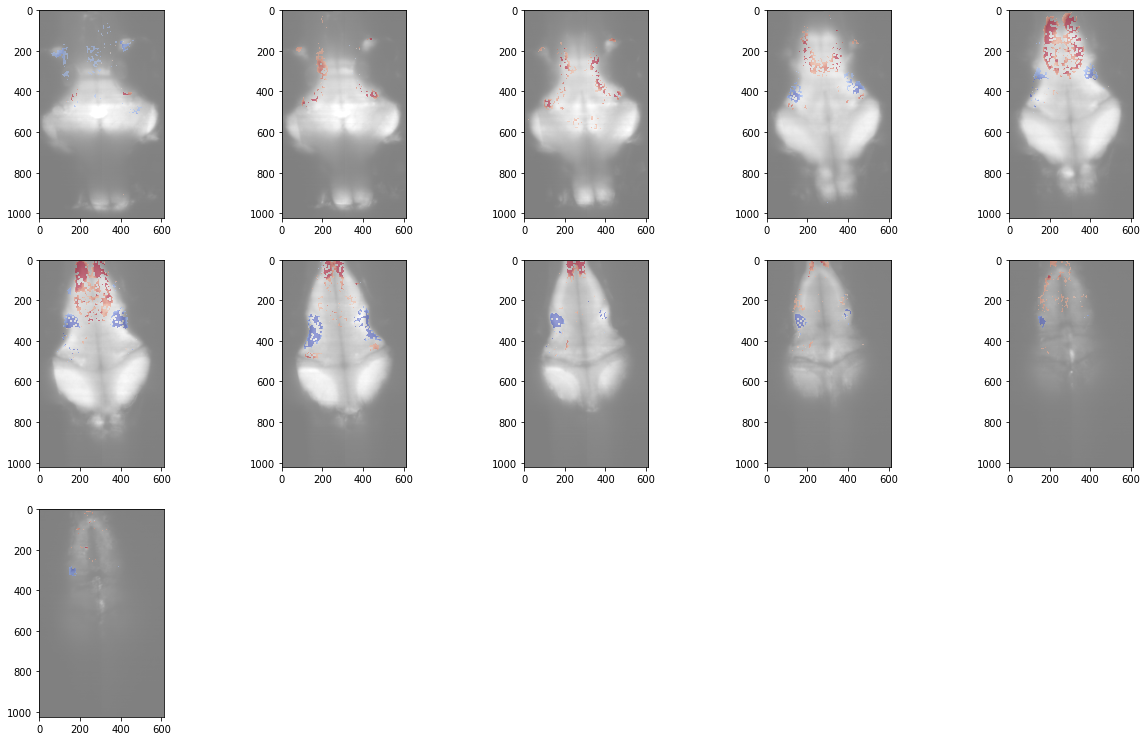

In [76]:
plt.figure(figsize=(21,13))
numSlabs = int(np.shape(A_ext2)[2])
thresh = 0.2
for i in range(numSlabs):
    plt.subplot(3,5,i+1)
    plt.imshow(brain_map[:,:,i], vmax=np.percentile(brain_map[:].squeeze(), 99.9),vmin=np.percentile(brain_map[:].squeeze(), 5),cmap='gray',alpha = 0.5)
    plt.imshow(A_ext2[:,:,i], cmap='coolwarm',alpha=0.5,vmin = -1*thresh,vmax =thresh)
#plt.colorbar()
        

#plt.savefig('/nrs/ahrens/Marc/20230826_ket_post/f4_20230828_152217/green/seg/figs/slabs_swim_post.png',dpi = 300)